<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_6_BonusAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import graphviz
from IPython.display import display

In [13]:
try:
    df = pd.read_csv("WineQT.csv")
except FileNotFoundError:
    print("Error: WineQT.csv not found. Please provide the correct file path.")
    exit()
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
df = df.drop('Id', axis=1)

In [4]:
X = df.drop('quality', axis=1)
y = df['quality']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3) #added max_depth
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

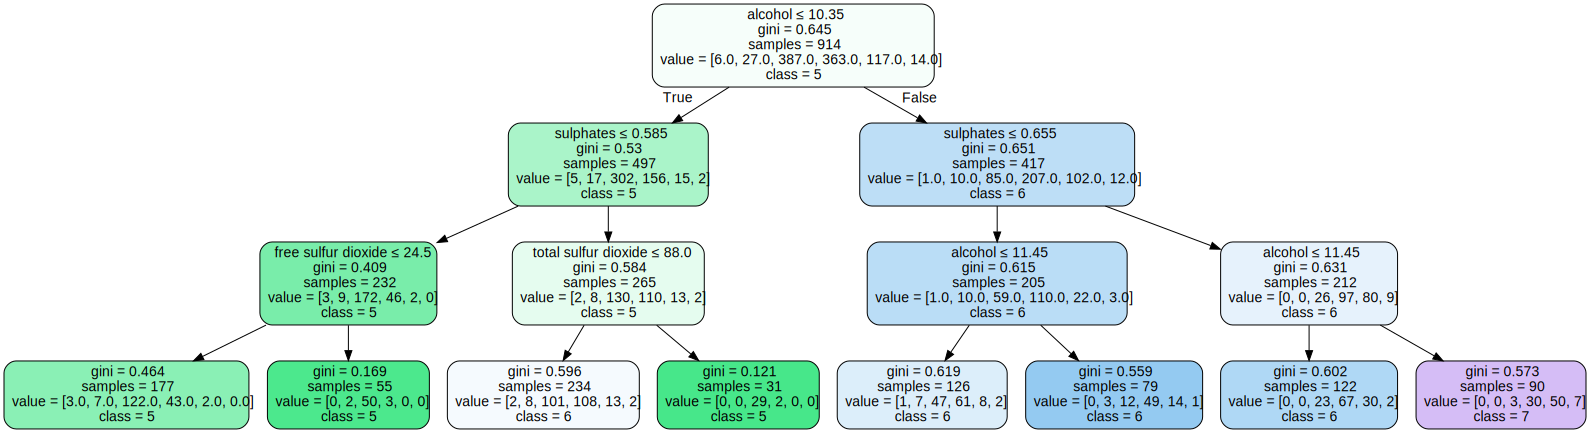

In [7]:
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(i) for i in sorted(y.unique())], #converts quality to string names
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [8]:
y_pred = dt_classifier.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


In [10]:
print("Initial Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Initial Model Performance:
Accuracy: 0.5807860262008734
Precision: 0.5919213973799127
Recall: 0.5807860262008734
F1-score: 0.5658974768524797


In [11]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.80      0.54      0.65        96
           6       0.53      0.77      0.63        99
           7       0.25      0.19      0.22        26
           8       0.00      0.00      0.00         2

    accuracy                           0.58       229
   macro avg       0.32      0.30      0.30       229
weighted avg       0.59      0.58      0.57       229


Confusion Matrix:
 [[ 0  2  4  0  0]
 [ 0 52 43  1  0]
 [ 0 11 76 12  0]
 [ 0  0 21  5  0]
 [ 0  0  0  2  0]]


In [15]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [16]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [17]:
best_dt = grid_search.best_estimator_

In [18]:
y_pred_tuned = best_dt.predict(X_test)

In [19]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)

In [22]:
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)



Tuned Model Performance:
Accuracy: 0.5502183406113537
Precision: 0.5193352741387676
Recall: 0.5502183406113537
F1-score: 0.5284987907946573


In [23]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.65      0.65        96
           6       0.52      0.63      0.57        99
           7       0.22      0.08      0.11        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.28      0.27      0.27       229
weighted avg       0.52      0.55      0.53       229


Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 2 62 32  0  0]
 [ 2 30 62  5  0]
 [ 0  1 23  2  0]
 [ 0  0  0  2  0]]


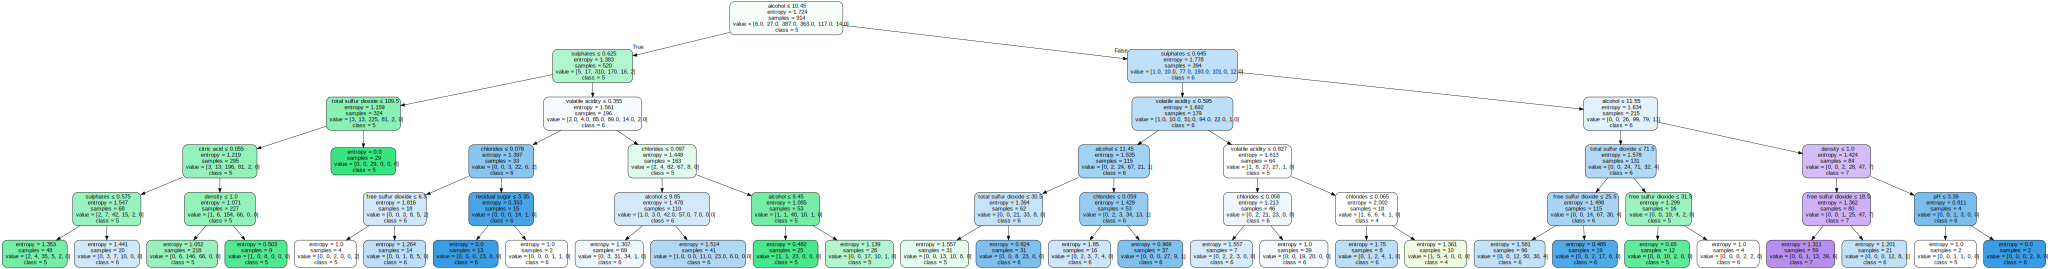

In [24]:
dot_data_tuned = export_graphviz(best_dt, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(i) for i in sorted(y.unique())],
                           filled=True, rounded=True,
                           special_characters=True)
graph_tuned = graphviz.Source(dot_data_tuned)
display(graph_tuned)